In [59]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.9 MB/s eta 0:00:00


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from wordcloud import WordCloud
import ast

Breaking down the excel for sql analysis

In [38]:
df = pd.read_excel('/content/YELP Restaurants FL.xlsx', sheet_name = 'ALL FL Extracted')
print(df.head())

                    name              city                     address state  \
0            Blessed Cup  Clearwater Beach  483 Mandalay Ave, Unit 200    FL   
1            Blessed Cup  Clearwater Beach  483 Mandalay Ave, Unit 200    FL   
2            Blessed Cup  Clearwater Beach  483 Mandalay Ave, Unit 200    FL   
3            Blessed Cup  Clearwater Beach  483 Mandalay Ave, Unit 200    FL   
4  Carlo's Sandwich Shop             Tampa          5713 E Columbus Dr    FL   

   postal_code  stars  review_count       category_name  
0      33767.0    4.5          33.0         Restaurants  
1      33767.0    4.5          33.0  Breakfast & Brunch  
2      33767.0    4.5          33.0               Cafes  
3      33767.0    4.5          33.0                Food  
4      33619.0    5.0          15.0  Breakfast & Brunch  


In [39]:
category = df['category_name'].unique()

df_category = category.tolist()
print(df_category)

['Restaurants', 'Breakfast & Brunch', 'Cafes', 'Food', 'Sandwiches', 'Pizza', 'American (Traditional)', 'Lounges', 'Bars', 'Pubs', 'Champagne Bars', 'Nightlife', 'Tapas Bars', 'Beer Bar', 'Japanese', 'Steakhouses', 'Sushi Bars', 'Hair Loss Centers', 'American (New)', 'Beauty & Spas', 'Sports Bars', 'Pest Control', 'Burgers', 'Local Services', 'Coffee & Tea', 'Fish & Chips', 'Chicken Wings', 'Latin American', 'Peruvian', 'Ice Cream & Frozen Yogurt', 'Bagels', 'Hot Dogs', 'Seafood', 'Italian', 'Local Flavor', 'Desserts', 'Bakeries', 'Diners', 'Mexican', 'Asian Fusion', 'Chinese', 'Thai', 'Salad', 'Cheesesteaks', 'Delis', 'Gas Stations', 'Automotive', 'Acai Bowls', 'Vegan', 'Juice Bars & Smoothies', 'Spanish', 'Empanadas', 'Tours', 'Venues & Event Spaces', 'Event Planning & Services', 'Hotels & Travel', 'Tacos', 'Fast Food', 'Caterers', 'Arts & Entertainment', 'Music Venues', 'Soup', 'Wine Bars', 'Wine & Spirits', 'Beer', 'Specialty Food', 'Barbeque', 'Fruits & Veggies', 'Mediterranean', 

In [40]:
table = [['Index', 'Category']]  # Adding headers
for idx, category in enumerate(df_category):
    table.append([idx, category])

# Print the table in a simple tabular format
for row in table:
    print(f"{row[0]:<10} {row[1]}")

Index      Category
0          Restaurants
1          Breakfast & Brunch
2          Cafes
3          Food
4          Sandwiches
5          Pizza
6          American (Traditional)
7          Lounges
8          Bars
9          Pubs
10         Champagne Bars
11         Nightlife
12         Tapas Bars
13         Beer Bar
14         Japanese
15         Steakhouses
16         Sushi Bars
17         Hair Loss Centers
18         American (New)
19         Beauty & Spas
20         Sports Bars
21         Pest Control
22         Burgers
23         Local Services
24         Coffee & Tea
25         Fish & Chips
26         Chicken Wings
27         Latin American
28         Peruvian
29         Ice Cream & Frozen Yogurt
30         Bagels
31         Hot Dogs
32         Seafood
33         Italian
34         Local Flavor
35         Desserts
36         Bakeries
37         Diners
38         Mexican
39         Asian Fusion
40         Chinese
41         Thai
42         Salad
43         Cheesesteaks
44         

In [41]:
city = df['city'].unique()

city = city.tolist()
print(city)

['Clearwater Beach', 'Tampa', 'St. Petersburg', 'Pinellas Park', 'Saint Petersburg', 'Clearwater', 'Port Richey', 'NEW PORT RICHEY', 'Holiday', 'Madeira Beach', 'Oldsmar', 'Lutz', 'Belleair Bluffs', 'Brandon', 'St Pete Beach', 'Largo', 'Dunedin', 'Palm Harbor', 'Tarpon Springs', 'Plant City', 'St. Pete Beach', 'St Petersburg', 'Riverview', 'Temple Terrace', 'New Port Richey', 'Spring Hill', 'Ruskin', 'Zephyrhills', 'Apollo Beach', 'Wesley Chapel', 'Thonotosassa', 'Tierra Verde', 'Tampa Bay', "Town 'n' Country", 'Seffner', 'Hudson', 'Seminole', 'Hernando Beach', 'Palm harbor', 'Indian Rocks Beach', 'Odessa', "Land O' Lakes", 'Lithia', 'Gulfport', 'Safety Harbor', 'St.Petersburg', 'Kenneth City', 'Saint Pete Beach', 'Sun City Center', 'Valrico', 'Westchase', 'Land O Lakes', 'Land o lakes', 'Treasure Island', 'Ozona', 'San Antonio', 'ST. PETE BEACH', 'Lutz fl', 'SPRINGHILL', 'Belleair Blf', 'Trinity', 'Wimauma', 'Town n Country', 'North Redington Beach', 'Pinecrest West Park', 'Thonosassa

In [42]:
table = [['Index', 'Category']]  # Adding headers
for idx, category in enumerate(city):
    table.append([idx, category])

# Print the table in a simple tabular format
for row in table:
    print(f"{row[0]:<10} {row[1]}")

Index      Category
0          Clearwater Beach
1          Tampa
2          St. Petersburg
3          Pinellas Park
4          Saint Petersburg
5          Clearwater
6          Port Richey
7          NEW PORT RICHEY
8          Holiday
9          Madeira Beach
10         Oldsmar
11         Lutz
12         Belleair Bluffs
13         Brandon
14         St Pete Beach
15         Largo
16         Dunedin
17         Palm Harbor
18         Tarpon Springs
19         Plant City
20         St. Pete Beach
21         St Petersburg
22         Riverview
23         Temple Terrace
24         New Port Richey
25         Spring Hill
26         Ruskin
27         Zephyrhills
28         Apollo Beach
29         Wesley Chapel
30         Thonotosassa
31         Tierra Verde
32         Tampa Bay
33         Town 'n' Country
34         Seffner
35         Hudson
36         Seminole
37         Hernando Beach
38         Palm harbor
39         Indian Rocks Beach
40         Odessa
41         Land O' Lakes
42         Li

Visualizations of data exported from sql analysis

In [49]:
city_df = pd.read_csv('/content/FL city.csv')
category_df = pd.read_csv('/content/FL restaurant categories.csv')

print(city_df.head())
print(category_df.head())

           city                                    name  stars  total_reviews  \
0  Apollo Beach  Circles Waterfront at Lands End Marina    4.0           1644   
1  Apollo Beach                        Latitudes Apollo    4.0            350   
2  Apollo Beach                 The Vineyards Trattoria    4.0            308   
3  Apollo Beach          Massimos Pizza Subs and Salads    4.0            228   
4  Apollo Beach                          Salty Shamrock    3.5            228   

   avg_stars  
0        4.0  
1        4.0  
2        4.0  
3        4.0  
4        3.5  
  category_name                   restaurant_name  stars  total_reviews  \
0    Acai Bowls                   Grain and Berry    4.0            676   
1    Acai Bowls  The Blind Tiger Cafe - Ybor City    4.5            662   
2    Acai Bowls                  KELP Sushi Joint    4.0            650   
3    Acai Bowls                    SOHO Juice Co.    4.0            628   
4    Acai Bowls    Farmacy Vegan Kitchen & Baker

Looking at reviews and stars for restaurants by city

In [50]:
city_rating = city_df.groupby('city')['stars'].mean()
city_stars = city_df.groupby('city')['stars'].count()
city_review = city_df.groupby('city')['total_reviews'].sum()
print(city_rating)
print(city_stars)
print(city_review)

city
Apollo Beach            3.392857
BRANDON                 2.500000
Balm                    4.500000
Bayonet Point           3.500000
Belleair Blf            3.000000
                          ...   
Westchase               4.000000
Wimauma                 4.300000
Wyndlake Condominium    3.500000
Zephyrhills             3.575000
wimauma                 4.500000
Name: stars, Length: 127, dtype: float64
city
Apollo Beach            42
BRANDON                  1
Balm                     1
Bayonet Point            2
Belleair Blf             2
                        ..
Westchase                4
Wimauma                  5
Wyndlake Condominium     1
Zephyrhills             60
wimauma                  1
Name: stars, Length: 127, dtype: int64
city
Apollo Beach            5142
BRANDON                  108
Balm                     208
Bayonet Point             86
Belleair Blf             350
                        ... 
Westchase                362
Wimauma                  208
Wyndlake Cond

In [67]:
# Function to deduplicate and merge city names using fuzzy matching
def merge_city_names(city_df, city, threshold=85):
    unique_cities = []
    city_map = {}

    for city in city_df['city']:
        match = process.extractOne(city, unique_cities, score_cutoff=threshold)
        if match:
            city_map[city] = match[0]
        else:
            unique_cities.append(city)
            city_map[city] = city

    city_df['city'] = city_df['city'].map(city_map)
    return city_df

df = merge_city_names(city_df, 'city')

# Group by city and aggregate the data
df_aggregated = df.groupby('city', as_index=False).agg(
    star_count=('stars', 'mean'),
    reviews=('total_reviews', 'sum')
)

print(df_aggregated)


                    city  star_count  reviews
0           Apollo Beach        4.10     5712
1                   Balm        4.50      208
2          Bayonet Point        3.00       76
3           Belleair Blf        3.25      916
4                Brandon        4.50     1816
..                   ...         ...      ...
63         Wesley Chapel        4.00     1508
64             Westchase        4.50      124
65               Wimauma        4.50      138
66  Wyndlake Condominium        3.50       16
67           Zephyrhills        4.50      562

[68 rows x 3 columns]


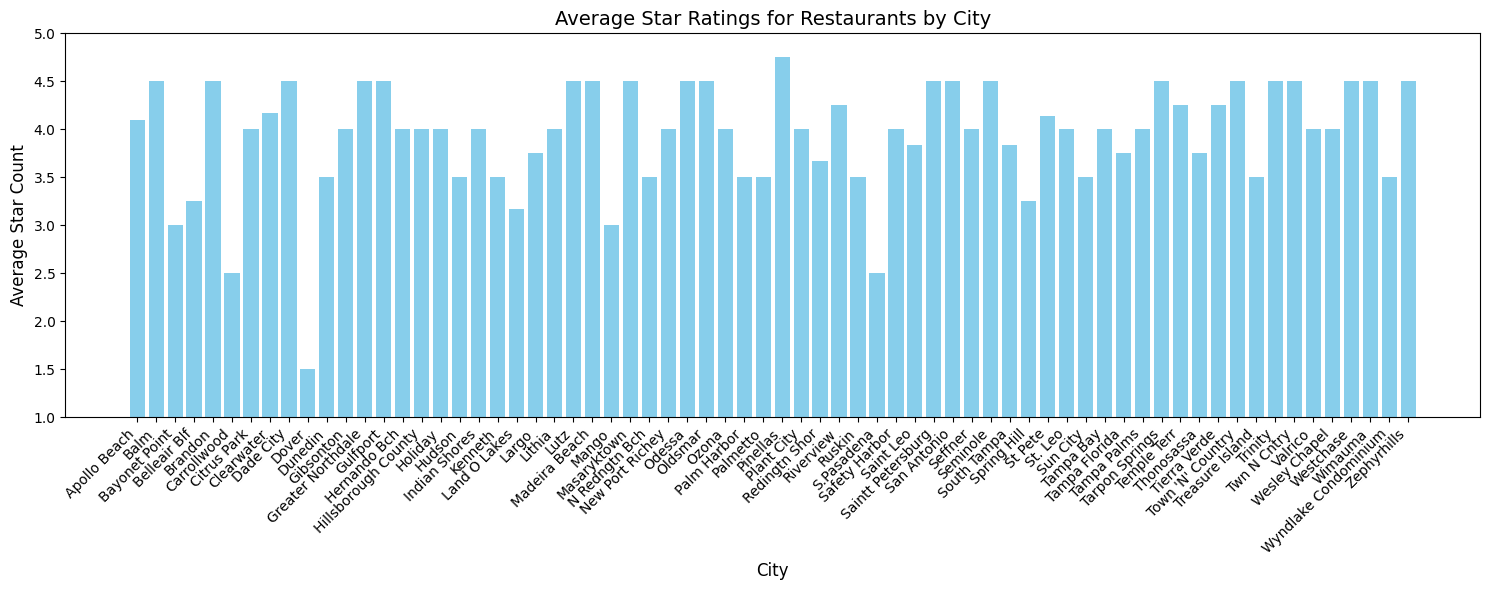

In [81]:
plt.figure(figsize=(15, 6))
plt.bar(df_aggregated['city'], df_aggregated['star_count'], color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Star Count', fontsize=12)
plt.title('Average Star Ratings for Restaurants by City', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()

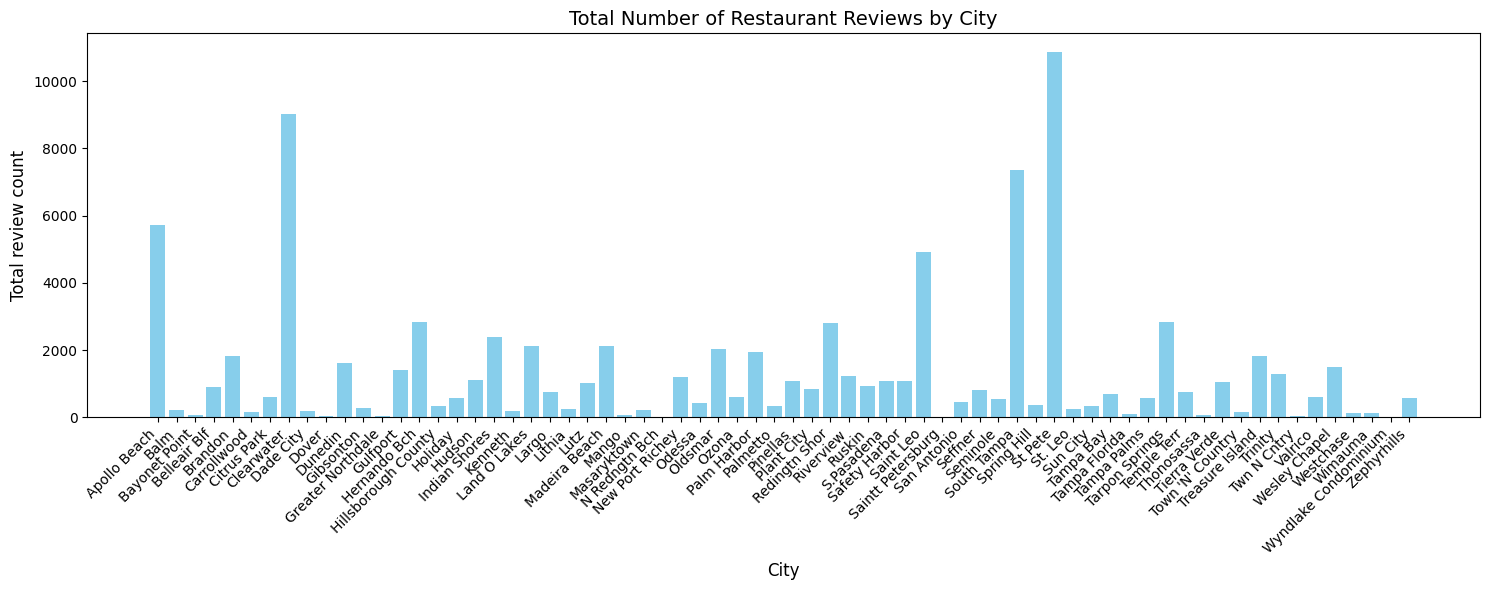

In [80]:
plt.figure(figsize=(15, 6))
plt.bar(df_aggregated['city'], df_aggregated['reviews'], color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total review count', fontsize=12)
plt.title('Total Number of Restaurant Reviews by City', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

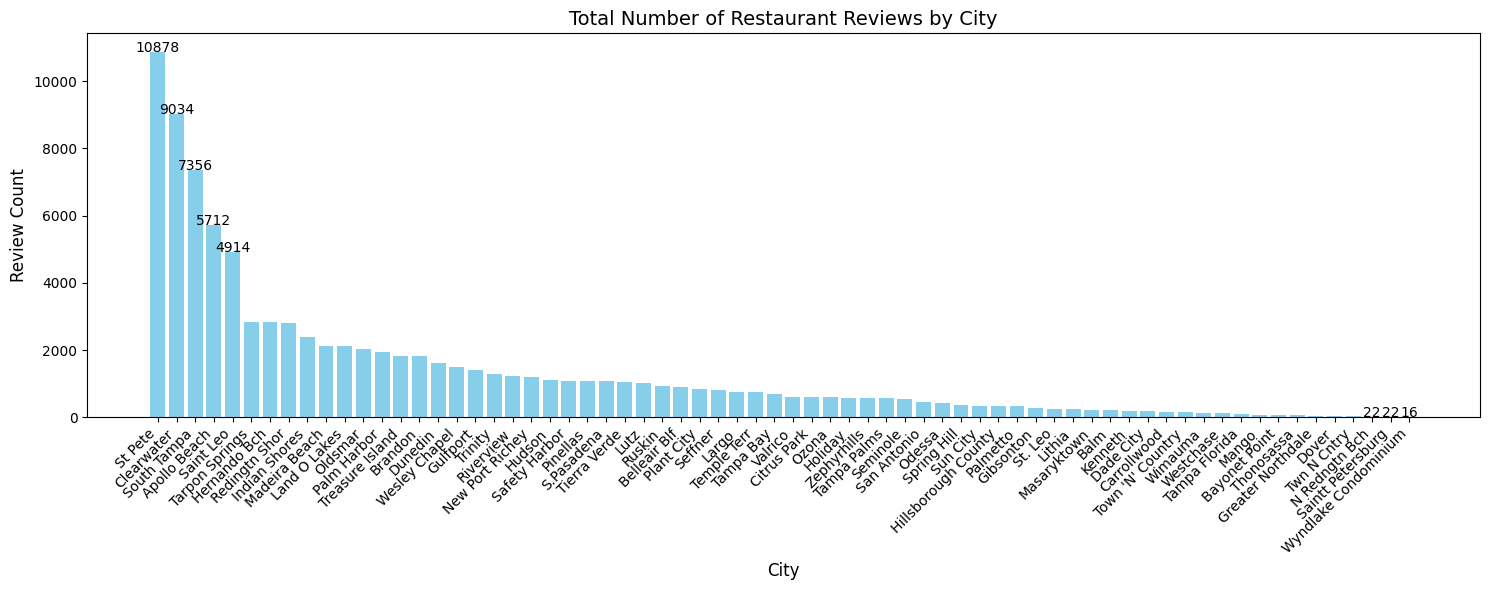

In [79]:
df_aggregated_sorted = df_aggregated.sort_values('reviews', ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(df_aggregated_sorted['city'], df_aggregated_sorted['reviews'], color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Total Number of Restaurant Reviews by City', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Label top 5 and bottom 3 cities
for i, v in enumerate(df_aggregated_sorted['reviews']):
    if i < 5 or i >= len(df_aggregated_sorted) - 3:  # Check if it's in top 5 or bottom 3
        plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')

plt.tight_layout()
plt.show()

Analysis of reviews and ratings by restraurant distance

In [83]:
km_df = pd.read_csv('/content/matched_zip_data.csv')
km_df.head()

,bid,business_id,restaurant name,address,city,state,postal_code,latitude,longitude,stars,...,Star 5,Star 4,Star 3,Star 2,Star 1,Average Stars,zipcode,distance_km,average,thumbup
0,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,787,375,145,77,133,4.058668,33602,1.002244,4.058668,0.765985
1,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,829,329,158,110,230,3.855676,33602,0.421970,3.855676,0.699275
2,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,873,117,28,14,53,4.606452,33602,1.622866,4.606452,0.912442
3,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,837,261,102,34,64,4.365948,33602,0.590933,4.365948,0.845917
4,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,3770,1163,289,105,172,4.501000,33602,1.622182,4.501000,0.897072


In [84]:
km_df.columns.tolist()

['bid',
 'business_id',
 'restaurant name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'cid',
 'category_name',
 'Hotel Name',
 'Description',
 'Coordinates',
 'Latitude',
 'Longitude',
 'Hotel Class',
 'Link',
 'Ratings',
 'Reviews',
 'Reviews Breakdown',
 'Address',
 'Star 5',
 'Star 4',
 'Star 3',
 'Star 2',
 'Star 1',
 'Average Stars',
 'zipcode',
 'distance_km',
 'average',
 'thumbup']

In [133]:
df = km_df.drop(columns = ['bid',
 'business_id',
 'address',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'is_open',
 'cid',
 'Coordinates',
 'Latitude',
 'Longitude',
 'Link',
 'Address',
 'Average Stars',
 'average',
 'thumbup'])
df.head()

,restaurant name,city,stars,review_count,category_name,Hotel Name,Description,Hotel Class,Ratings,Reviews,Reviews Breakdown,Star 5,Star 4,Star 3,Star 2,Star 1,zipcode,distance_km
0,Vietnamese Food Truck,Tampa Bay,4.0,10,Restaurants,Aloft Tampa Downtown,A contemporary selection offering modern rooms...,3,"[{'stars': 5, 'count': 787}, {'stars': 4, 'cou...",1517,"[{'name': 'Bar', 'description': 'Bar or lounge...",787,375,145,77,133,33602,1.002244
1,Vietnamese Food Truck,Tampa Bay,4.0,10,Restaurants,"Hotel Flor Tampa Downtown, Tapestry Collection...",Ornate rooms & suites in a restored 1926 hotel...,4,"[{'stars': 5, 'count': 829}, {'stars': 4, 'cou...",1656,"[{'name': 'Service', 'description': 'Service',...",829,329,158,110,230,33602,0.421970
2,Vietnamese Food Truck,Tampa Bay,4.0,10,Restaurants,JW Marriott Tampa Water Street,Refined quarters in an upmarket hotel with a s...,4,"[{'stars': 5, 'count': 873}, {'stars': 4, 'cou...",1085,"[{'name': 'Wellness', 'description': 'Wellness...",873,117,28,14,53,33602,1.622866
3,Vietnamese Food Truck,Tampa Bay,4.0,10,Restaurants,"Le MÃ©ridien Tampa, The Courthouse",Contemporary quarters in an upscale property w...,4,"[{'stars': 5, 'count': 837}, {'stars': 4, 'cou...",1298,"[{'name': 'Couples', 'description': 'Couple fr...",837,261,102,34,64,33602,0.590933
4,Vietnamese Food Truck,Tampa Bay,4.0,10,Restaurants,Tampa Marriott Water Street,"Modern waterfront hotel with laid-back rooms, ...",4,"[{'stars': 5, 'count': 3770}, {'stars': 4, 'co...",5499,"[{'name': 'Location', 'description': 'Location...",3770,1163,289,105,172,33602,1.622182


In [144]:
yelp_unique = df.drop_duplicates(subset = ['restaurant name', 'city'])
yelp_unique = yelp_unique.drop(columns = ['Hotel Name', 'Description', 'Hotel Class',
                            'Ratings', 'Reviews', 'Reviews Breakdown', 'zipcode',
                             'Star 5',	'Star 4',	'Star 3',	'Star 2',	'Star 1'])
yelp_unique.head()

,restaurant name,city,stars,review_count,category_name,distance_km
0,Vietnamese Food Truck,Tampa Bay,4.0,10,Restaurants,1.002244
7,Roman Forum,Tampa,4.0,23,Restaurants,3.222898
8,Joe's Pizza,Tampa,4.0,35,Restaurants,5.594031
15,The Pearl,Treasure Island,4.0,129,Restaurants,4.720733
21,530 Pub & Grill,Clearwater,4.5,6,Restaurants,2.918772


In [137]:
hotels = km_df[['Hotel Name', 'Description', 'Hotel Class',
                            'Ratings', 'Reviews', 'Reviews Breakdown', 'zipcode',
                            'distance_km', 'Star 5',	'Star 4',	'Star 3',	'Star 2',	'Star 1']]
hotels.head()

,Hotel Name,Description,Hotel Class,Ratings,Reviews,Reviews Breakdown,zipcode,distance_km,Star 5,Star 4,Star 3,Star 2,Star 1
0,Aloft Tampa Downtown,A contemporary selection offering modern rooms...,3,"[{'stars': 5, 'count': 787}, {'stars': 4, 'cou...",1517,"[{'name': 'Bar', 'description': 'Bar or lounge...",33602,1.002244,787,375,145,77,133
1,"Hotel Flor Tampa Downtown, Tapestry Collection...",Ornate rooms & suites in a restored 1926 hotel...,4,"[{'stars': 5, 'count': 829}, {'stars': 4, 'cou...",1656,"[{'name': 'Service', 'description': 'Service',...",33602,0.421970,829,329,158,110,230
2,JW Marriott Tampa Water Street,Refined quarters in an upmarket hotel with a s...,4,"[{'stars': 5, 'count': 873}, {'stars': 4, 'cou...",1085,"[{'name': 'Wellness', 'description': 'Wellness...",33602,1.622866,873,117,28,14,53
3,"Le MÃ©ridien Tampa, The Courthouse",Contemporary quarters in an upscale property w...,4,"[{'stars': 5, 'count': 837}, {'stars': 4, 'cou...",1298,"[{'name': 'Couples', 'description': 'Couple fr...",33602,0.590933,837,261,102,34,64
4,Tampa Marriott Water Street,"Modern waterfront hotel with laid-back rooms, ...",4,"[{'stars': 5, 'count': 3770}, {'stars': 4, 'co...",5499,"[{'name': 'Location', 'description': 'Location...",33602,1.622182,3770,1163,289,105,172


In [178]:
# Filter DataFrame for distance <= 0.8 km
df_halfmile = df[df['distance_km'] <= 0.8]
print(df_halfmile.head())

# Filter DataFrame for distance between 0.8 and 1.6 km
df_mile = df[(df['distance_km'] > 0.8) & (df['distance_km'] <= 1.6)]
print(df_mile.head())

# Filter DataFrame for distance between 1.6 and 2.4 km
df_milehalf = df[(df['distance_km'] > 1.6) & (df['distance_km'] <= 2.4)]
print(df_milehalf.head())

# Filter DataFrame for distance between 2.4 and 3.2 km
df_two = df[(df['distance_km'] > 2.4) & (df['distance_km'] <= 3.2)]
print(df_two.head())

# Filter DataFrame for distance between 3.2 and 4 km
df_twohalf = df[(df['distance_km'] > 3.2) & (df['distance_km'] <= 4)]
print(df_twohalf.head())
print(df_twohalf.info())

             restaurant name       city  stars  review_count category_name  \
1      Vietnamese Food Truck  Tampa Bay    4.0            10   Restaurants   
3      Vietnamese Food Truck  Tampa Bay    4.0            10   Restaurants   
5      Vietnamese Food Truck  Tampa Bay    4.0            10   Restaurants   
23          Lee Roy Selmon's      Tampa    3.5            42   Restaurants   
44  The Corner Cafe and Deli      Tampa    4.0             6   Restaurants   

                                           Hotel Name  \
1   Hotel Flor Tampa Downtown, Tapestry Collection...   
3                  Le MÃ©ridien Tampa, The Courthouse   
5                 The Barrymore Hotel Tampa Riverwalk   
23                  Emerald Greens Hotel Condo Resort   
44                               Aloft Tampa Downtown   

                                          Description  Hotel Class  \
1   Ornate rooms & suites in a restored 1926 hotel...            4   
3   Contemporary quarters in an upscale property

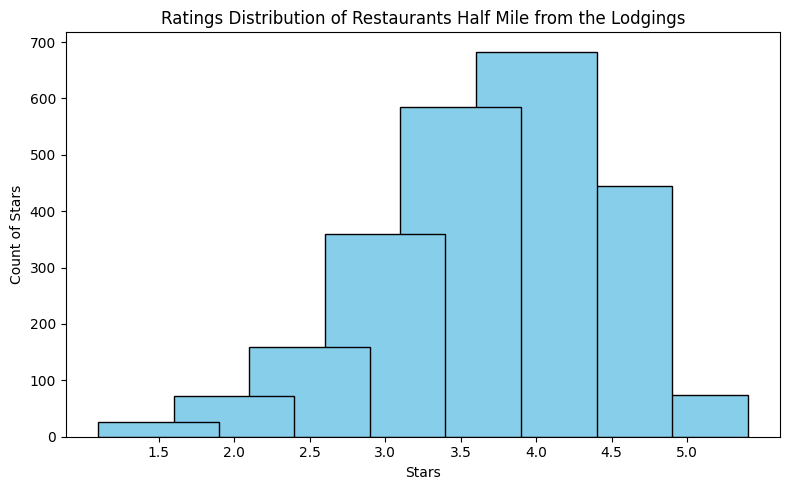

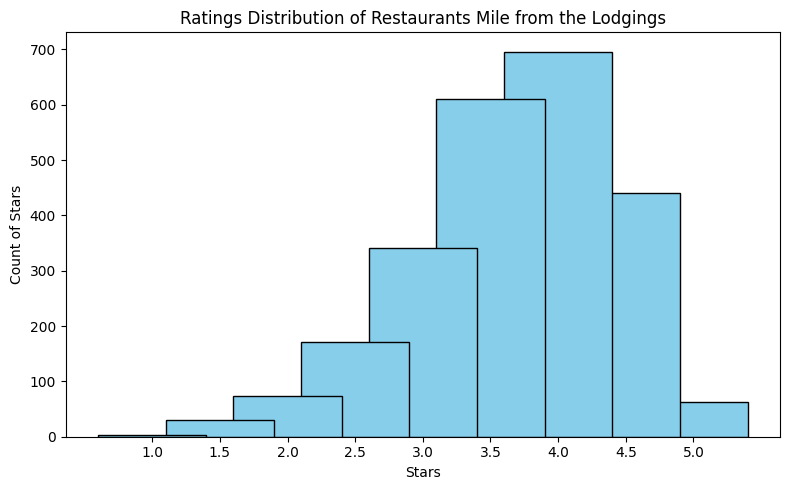

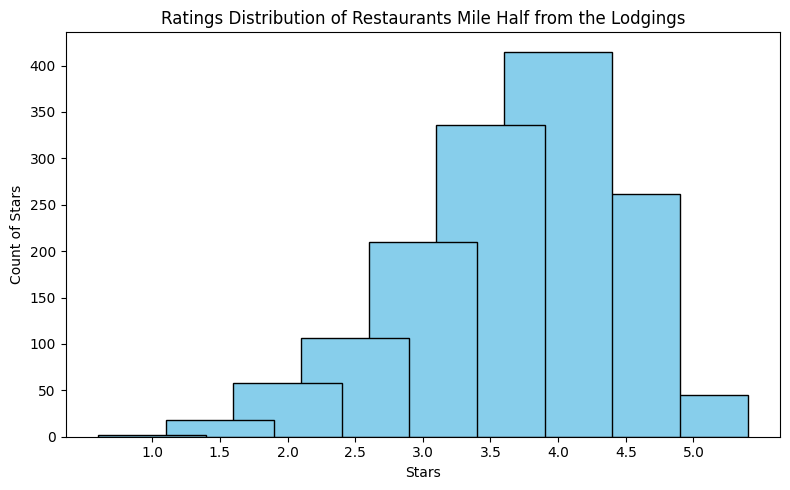

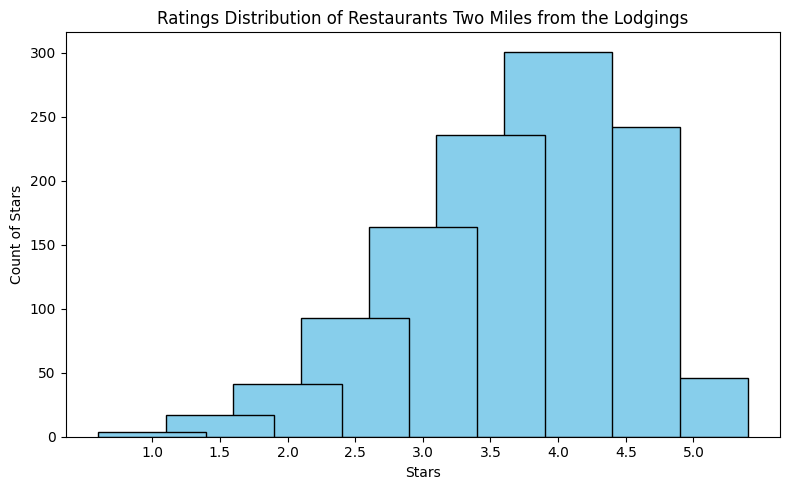

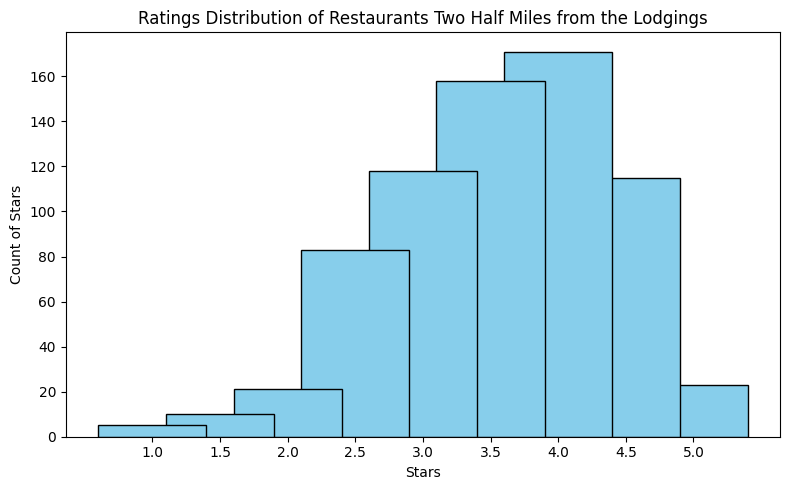

In [189]:
def calculate_star_distribution(df, title):
    ratings_summary = df['stars'].value_counts().reset_index()
    ratings_summary.columns = ['stars', 'count']

    ratings_summary = ratings_summary.sort_values(by='stars', ascending=False)

    plt.figure(figsize=(8, 5))
    bar_width = 1
    plt.bar(ratings_summary['stars'], ratings_summary['count'], color='skyblue', edgecolor='black')
    plt.title(f"Ratings Distribution of Restaurants {title} from the Lodgings")  # Use the title passed to the function
    plt.xlabel("Stars")
    plt.ylabel("Count of Stars")
    plt.xticks(ratings_summary['stars'])
    plt.tight_layout()
    plt.show()

    return ratings_summary

df_titles = {
    'df_halfmile': 'Half Mile',
    'df_mile': 'Mile',
    'df_milehalf': 'Mile Half',
    'df_two': 'Two Miles',
    'df_twohalf': 'Two Half Miles'
}


for df_name, title in df_titles.items():
    df = globals()[df_name]
    calculate_star_distribution(df, title)


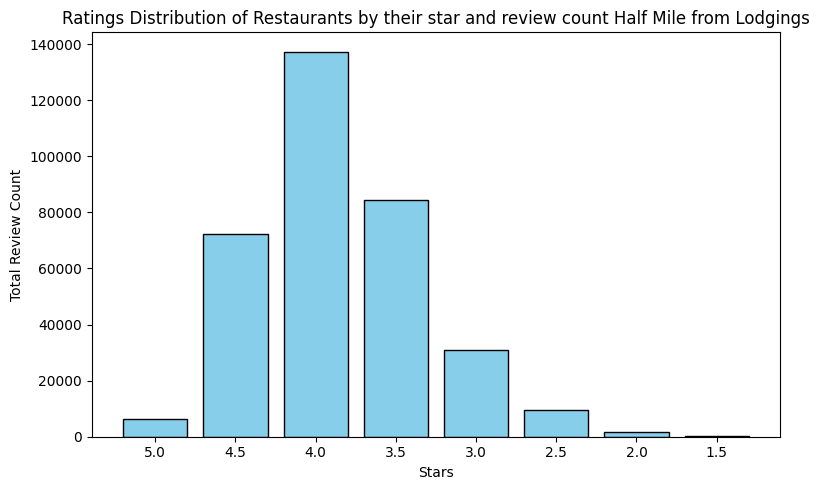

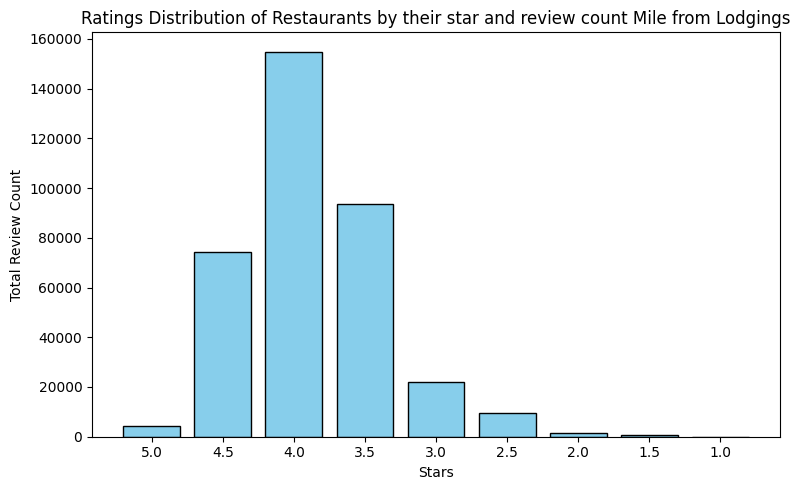

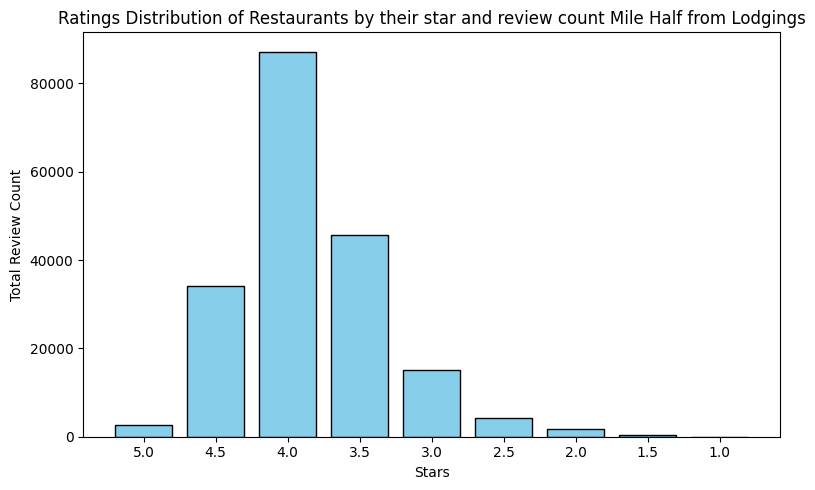

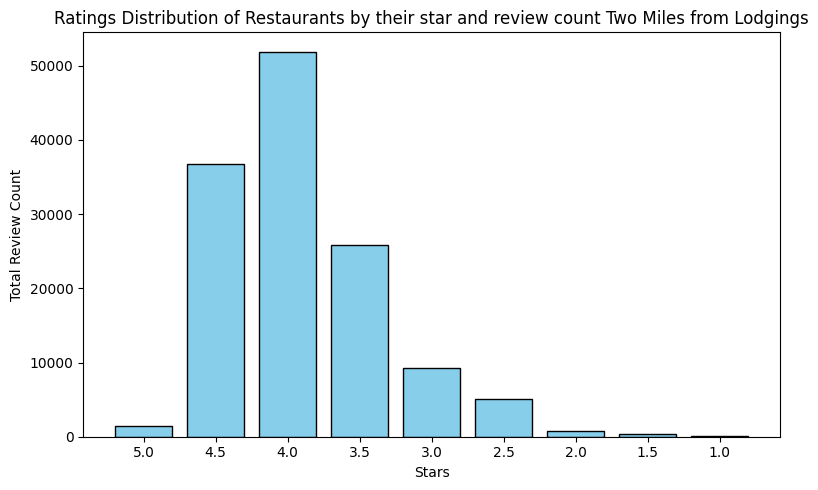

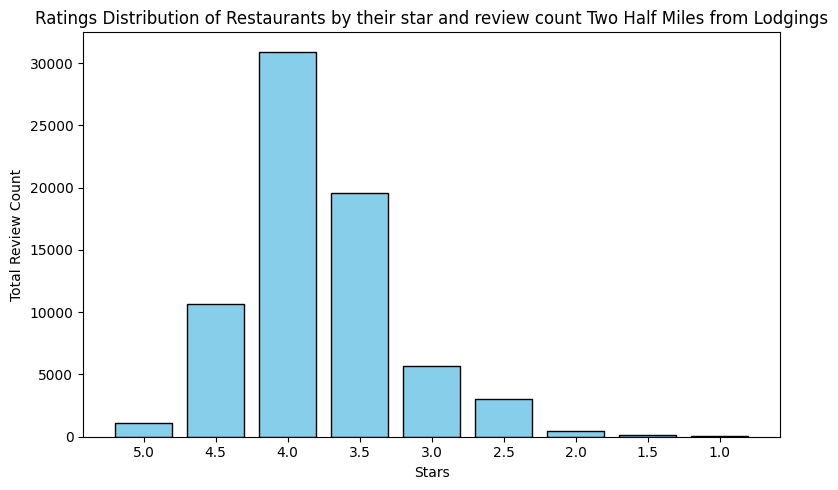

In [191]:
def calculate_star_distribution(df, title):
    ratings_summary = df.groupby('stars')['review_count'].sum().reset_index()

    ratings_summary = ratings_summary.sort_values(by='stars', ascending=False)

    plt.figure(figsize=(8, 5))

    x_positions = range(len(ratings_summary))

    plt.bar(x_positions, ratings_summary['review_count'], color='skyblue', edgecolor='black')

    plt.title(f"Ratings Distribution of Restaurants by their star and review count {title} from Lodgings")
    plt.xlabel("Stars")
    plt.ylabel("Total Review Count")

    plt.xticks(x_positions, ratings_summary['stars'])

    plt.tight_layout()
    plt.show()

    return ratings_summary

df_titles = {
    'df_halfmile': 'Half Mile',
    'df_mile': 'Mile',
    'df_milehalf': 'Mile Half',
    'df_two': 'Two Miles',
    'df_twohalf': 'Two Half Miles'
}

for df_name, title in df_titles.items():
    df = globals()[df_name]
    calculate_star_distribution(df, title)
